# HEPATITIS

Hepatitis is a term used to describe inflammatory condition in liver. It's commomnly caused by viral infection, but there are other possible causes of hepatitis. These include autoimmune hepatitis and hepatitis that occurs as a secondary result of medications, drugs, toxins, and alcohol. Acute hepatitis occurs when it lasts for less than six months and chronic if it persists for longer duration.

# IMPORTING LIBRARIES:

In [136]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\91979\\Desktop\\hepatitis_csv.csv")

In [3]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [4]:
df.shape

(155, 20)

In [5]:
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [7]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


Checking for missing values:

In [8]:
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

This data contains more missing values. Equal amount of missing values are present in both numerical and categorica variables. 
I've imputing these missing values in R studio using mice imputer so that both numerical and categorical values gets imputed.

# R Studio Scripting: 

In [9]:
import subprocess

In [10]:
f = open('imputed_hepatitis.R','w+')
f.write('''
library(mice)
df <- read.csv('hepatitis_csv.csv',na.strings=c("na","NA"," ",""))
res <- mice(data=df,m=5,method="pmm",maxiter=5)
complete(res,1) -> result
write.csv(result,"hepatitis_csv_imputation.csv",row.names=FALSE)
''')
f.close()

subprocess.call("imputed_hepatitis.R",shell=True)

0

In [11]:
df1 = pd.read_csv("C:\\Users\\91979\\Desktop\\hepatitis.csv", index_col="Unnamed: 0")

In [12]:
df1

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
1,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,100,False,live
2,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,60,False,live
3,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,0,False,live
4,31,female,False,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,78,200,4.0,35,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,85,242,3.3,50,True,die
152,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126,142,4.3,31,True,live
153,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75,20,4.1,100,True,live
154,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81,19,4.1,48,True,live


<AxesSubplot:xlabel='age', ylabel='count'>

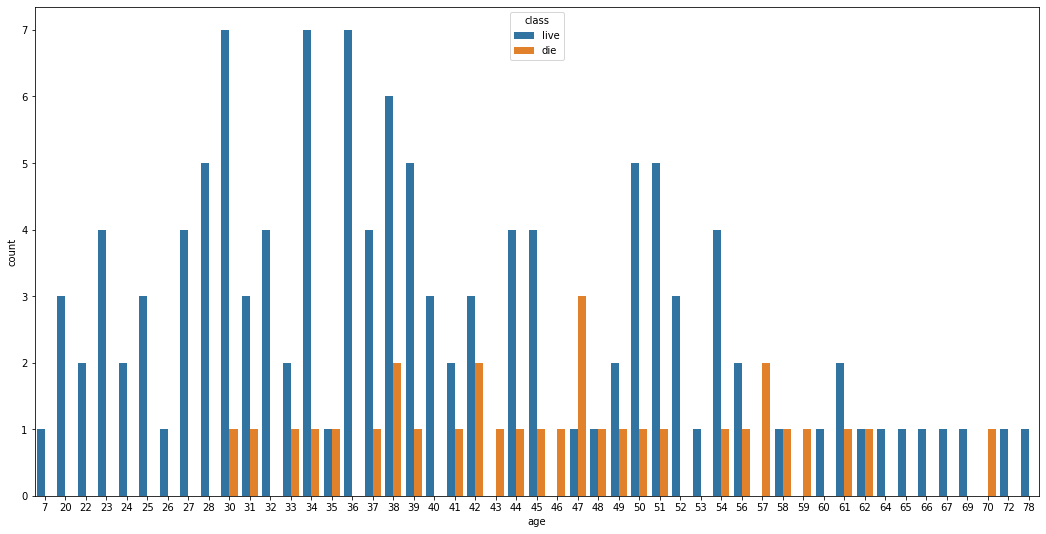

In [67]:
plt.figure(figsize=(18,9))
sns.countplot(x='age', data=df1, hue='class')

In [13]:
numerical_data = df1.select_dtypes(include=['int64','float64'])

In [14]:
numerical_data.columns

Index(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], dtype='object')

In [15]:
numerical_data

,age,bilirubin,alk_phosphate,sgot,albumin,protime
1,30,1.0,85,18,4.0,100
2,50,0.9,135,42,3.5,60
3,78,0.7,96,32,4.0,0
4,31,0.7,46,52,4.0,80
5,34,1.0,78,200,4.0,35
...,...,...,...,...,...,...
151,46,7.6,85,242,3.3,50
152,44,0.9,126,142,4.3,31
153,61,0.8,75,20,4.1,100
154,53,1.5,81,19,4.1,48


In [16]:
categorical_data = df1.select_dtypes(include=['object','bool'])

In [17]:
categorical_data.columns

Index(['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'histology', 'class'],
      dtype='object')

In [18]:
categorical_data

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
1,male,False,False,False,False,False,False,False,False,False,False,False,False,live
2,female,False,False,True,False,False,False,False,False,False,False,False,False,live
3,female,True,False,True,False,False,True,False,False,False,False,False,False,live
4,female,False,True,False,False,False,True,False,False,False,False,False,False,live
5,female,True,False,False,False,False,True,False,False,False,False,False,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,female,True,False,True,True,True,True,False,False,True,True,True,True,die
152,female,True,False,True,False,False,True,True,False,False,False,False,True,live
153,female,False,False,True,True,False,False,True,False,True,False,False,True,live
154,male,False,False,True,False,False,True,False,True,True,False,True,True,live


# EXPLORATORY DATA ANALYSIS:

# Patients Status:

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

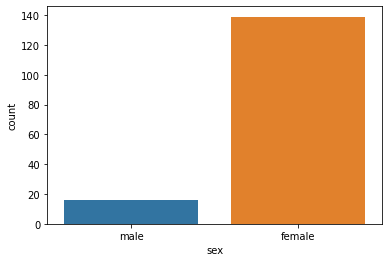

In [109]:
sns.countplot(df1['sex'])

# Patients Current Status:

In [107]:
categorical_data.groupby(categorical_data["sex"])["class"].value_counts(normalize=True)*100

sex     class
female  live      76.978417
        die       23.021583
male    live     100.000000
Name: class, dtype: float64

The categorical columns present in the data is seperated. All the categorical columns are plotted graphically and explained about the intake of medicines and symptoms faced by the patients.

76% of female are alive and 23% of female are dead in the total dataset.

None of the male patients are dead.

# Patients Consuming Steroid Status:

Steroids include drugs used to relieve swelling and inflammation.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


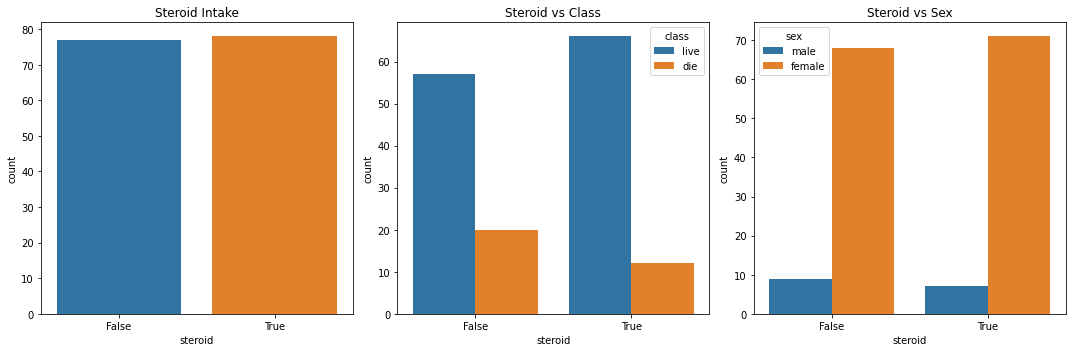

In [52]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['steroid'], ax= ax[0]);
sns.countplot(df1['steroid'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['steroid'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('Steroid Intake')
ax[1].set_title('Steroid vs Class')
ax[2].set_title('Steroid vs Sex')
plt.tight_layout();

In [117]:
categorical_data.groupby(categorical_data['sex'])['steroid'].value_counts(normalize=True)*100

sex     steroid
female  True       51.079137
        False      48.920863
male    False      56.250000
        True       43.750000
Name: steroid, dtype: float64

Text(0.5, 1.0, 'The age group between 28-30 and 50-52 are taking steroids')

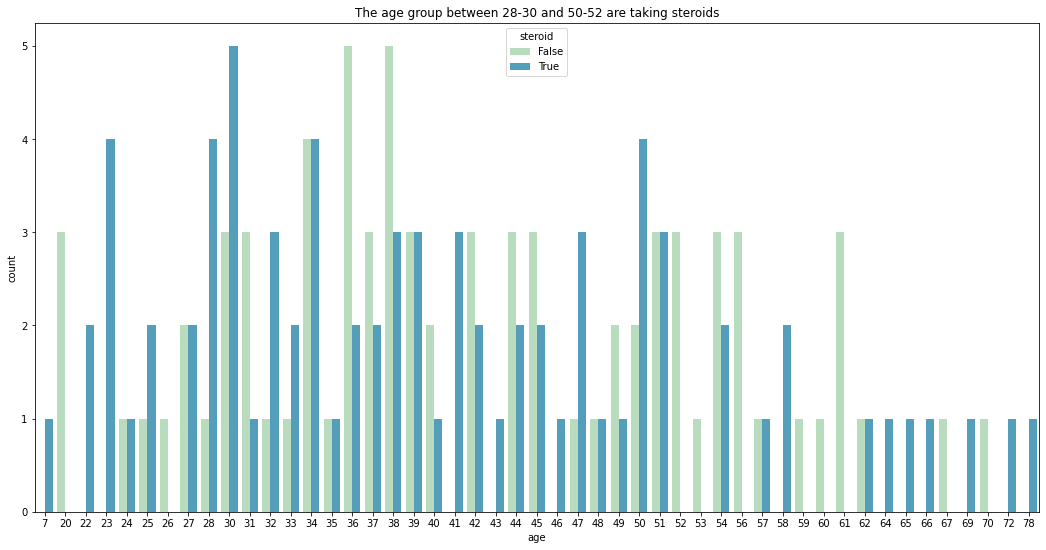

In [93]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='steroid', palette='GnBu')
plt.title("The age group between 28-30 and 50-52 are taking steroids")

# Patients Consuming Antivirals Status: 

Antivirals is a cheif drug which is more effecient against the virus. 

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


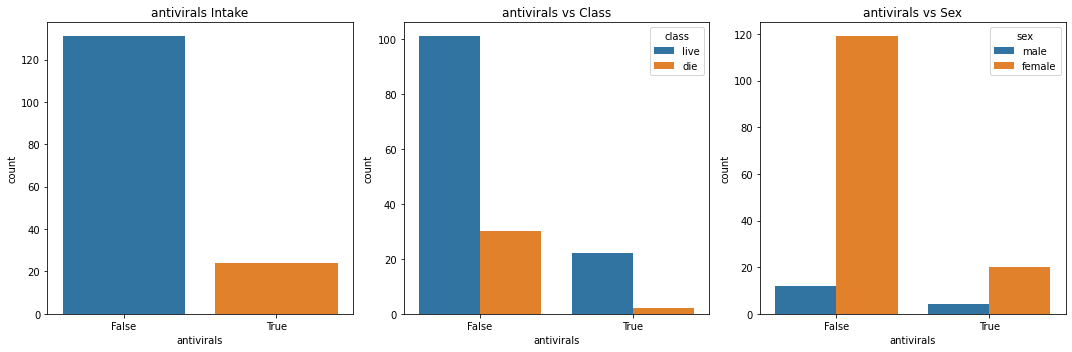

In [53]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['antivirals'], ax= ax[0]);
sns.countplot(df1['antivirals'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['antivirals'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('antivirals Intake')
ax[1].set_title('antivirals vs Class')
ax[2].set_title('antivirals vs Sex')
plt.tight_layout();

In [118]:
categorical_data.groupby(categorical_data['sex'])['antivirals'].value_counts(normalize=True)*100

sex     antivirals
female  False         85.611511
        True          14.388489
male    False         75.000000
        True          25.000000
Name: antivirals, dtype: float64

Text(0.5, 1.0, 'The age group between 39-42 are the most to intake antivirals')

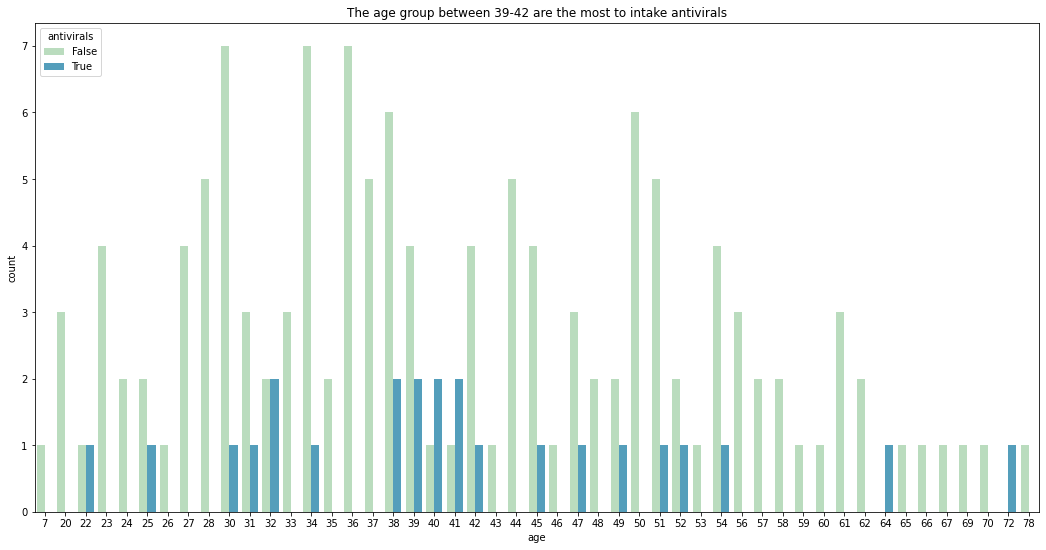

In [94]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='antivirals',palette='GnBu')
plt.title("The age group between 39-42 are the most to intake antivirals")

# Patients Consuming Fatigue Current Status:

 - Fatigue is feeling overtired, with low energy and a strong desire to sleep that interferes with normal daily activities.
 - Fatigue can have causes that aren't due to underlying disease. Examples include lack of sleep, heavy exertion, jet lag, a large meal or ageing.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


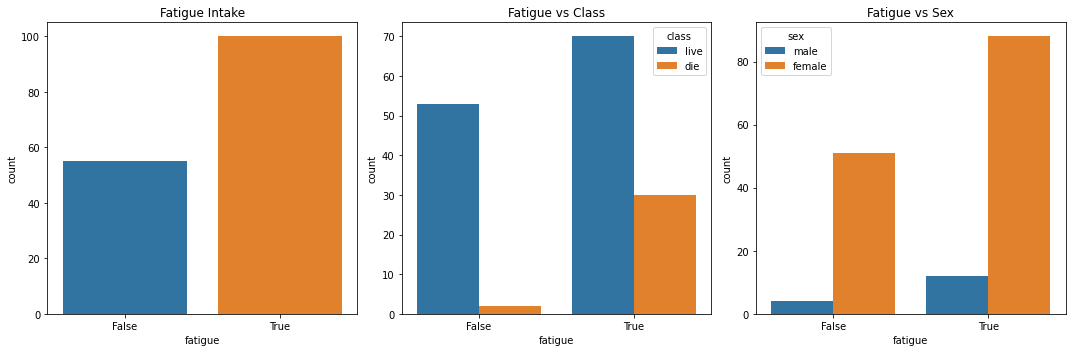

In [56]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['fatigue'], ax= ax[0]);
sns.countplot(df1['fatigue'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['fatigue'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('Fatigue Intake')
ax[1].set_title('Fatigue vs Class')
ax[2].set_title('Fatigue vs Sex')
plt.tight_layout();

In [119]:
categorical_data.groupby(categorical_data['sex'])['fatigue'].value_counts(normalize=True)*100

sex     fatigue
female  True       63.309353
        False      36.690647
male    True       75.000000
        False      25.000000
Name: fatigue, dtype: float64

Text(0.5, 1.0, 'Fatigue is extreamly more in the age group between 51 and low in 34-36')

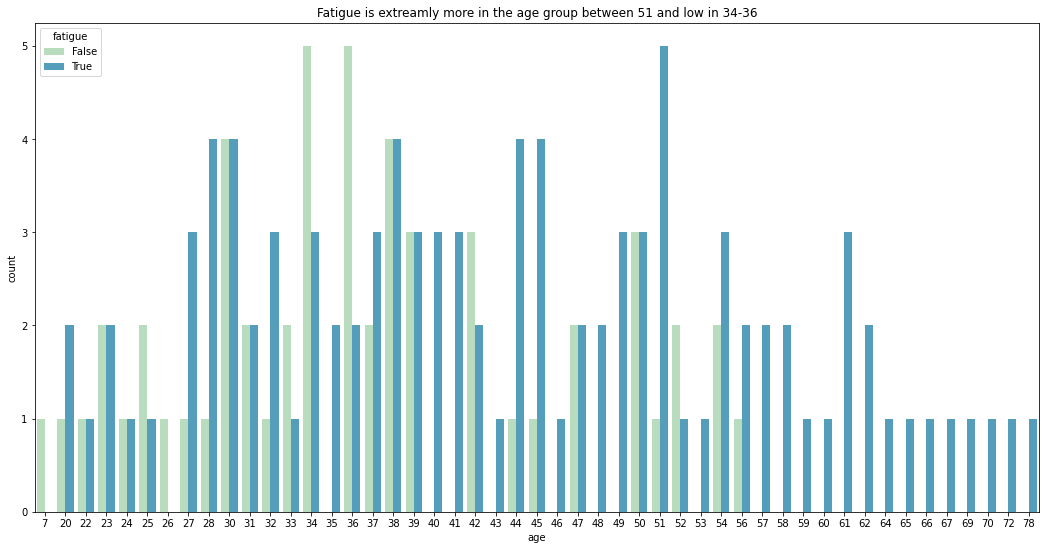

In [95]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='fatigue', palette='GnBu')
plt.title("Fatigue is extreamly more in the age group between 51 and low in 34-36")

# Patients Consuming Malaise Current Status:

 - A general sense of being unwell, often accompanied by fatigue, diffuse pain or lack of interest in activities. it is related to food intake of the patients.
 - The symptoms include headache, malaise, and fatigue. An infected person will feel a general malaise.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


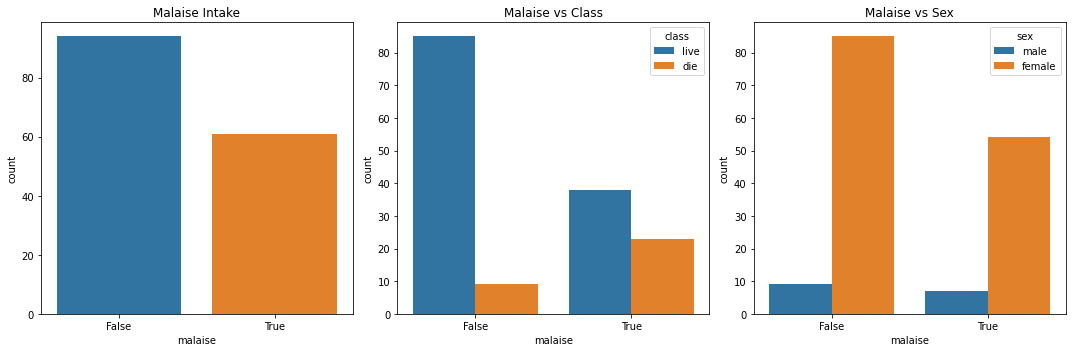

In [55]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['malaise'], ax= ax[0]);
sns.countplot(df1['malaise'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['malaise'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('Malaise Intake')
ax[1].set_title('Malaise vs Class')
ax[2].set_title('Malaise vs Sex')
plt.tight_layout();

In [120]:
categorical_data.groupby(categorical_data['sex'])['malaise'].value_counts(normalize=True)*100

sex     malaise
female  False      61.151079
        True       38.848921
male    False      56.250000
        True       43.750000
Name: malaise, dtype: float64

Text(0.5, 1.0, 'Malaise has the lowest counts in all age groups')

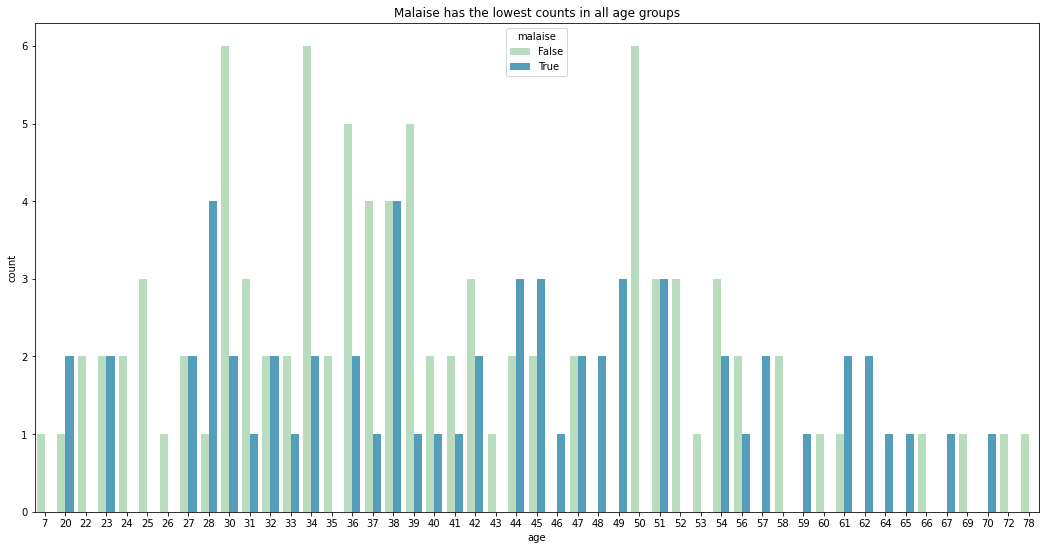

In [96]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='malaise',palette='GnBu')
plt.title("Malaise has the lowest counts in all age groups")

# Patients Consuming Anorexia Current Status:

 - Anorexia is an eating disorder causing people to obsess about weight and what they eat.
 - Anorexia is characterised by a distorted body image, with an unwarranted fear of being overweight.
 - Symptoms include trying to maintain a below-normal weight through starvation or too much exercise.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


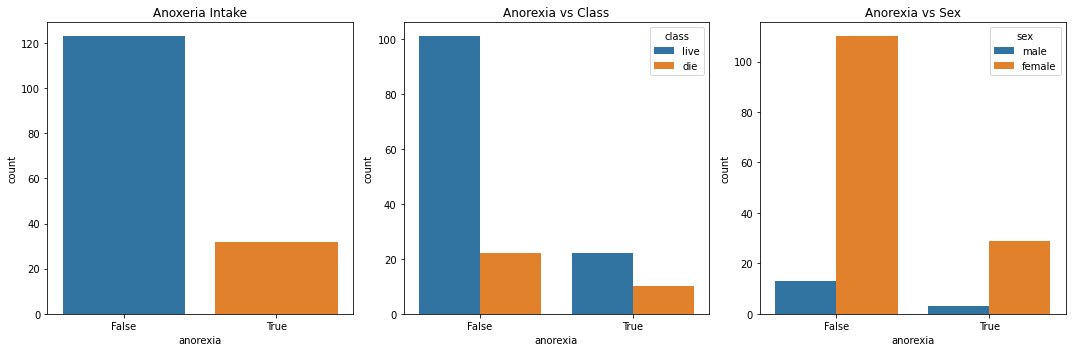

In [57]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['anorexia'], ax= ax[0]);
sns.countplot(df1['anorexia'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['anorexia'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('Anoxeria Intake')
ax[1].set_title('Anorexia vs Class')
ax[2].set_title('Anorexia vs Sex')
plt.tight_layout();

In [121]:
categorical_data.groupby(categorical_data['sex'])['anorexia'].value_counts(normalize=True)*100

sex     anorexia
female  False       79.136691
        True        20.863309
male    False       81.250000
        True        18.750000
Name: anorexia, dtype: float64

Text(0.5, 1.0, 'Anorexia has the lowest counts in all age groups ')

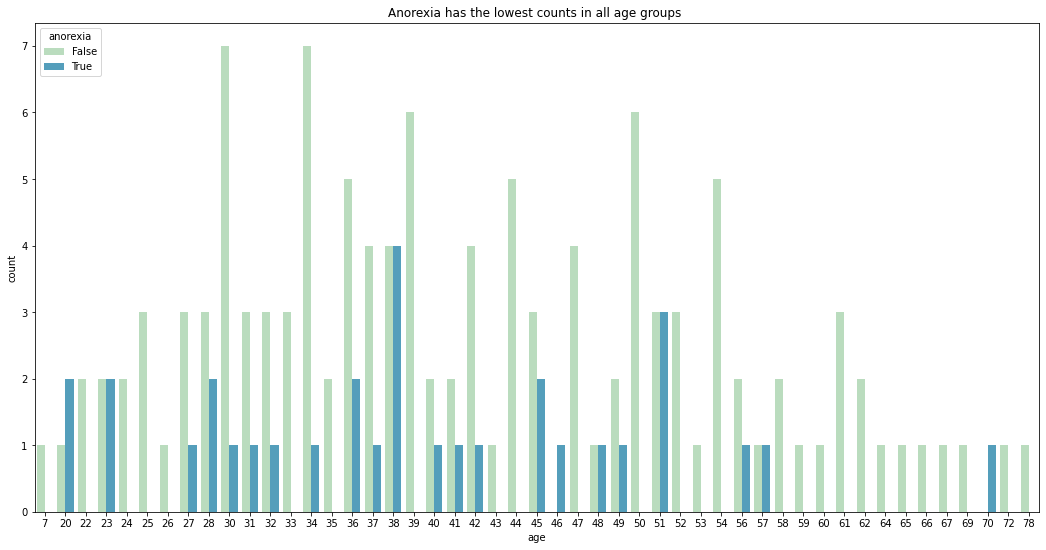

In [97]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='anorexia', palette='GnBu')
plt.title("Anorexia has the lowest counts in all age groups ")

# Patients Consuming Liver_big Current Status:

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


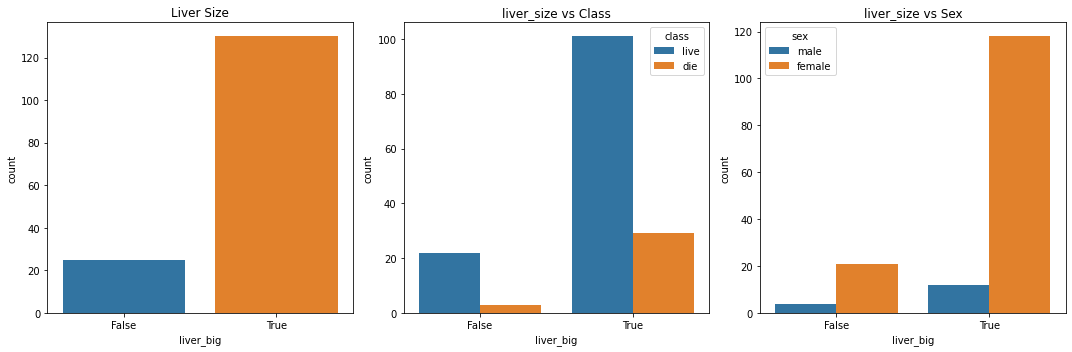

In [59]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['liver_big'], ax= ax[0]);
sns.countplot(df1['liver_big'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['liver_big'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('Liver Size')
ax[1].set_title('liver_size vs Class')
ax[2].set_title('liver_size vs Sex')
plt.tight_layout();

In [122]:
categorical_data.groupby(categorical_data['sex'])['liver_big'].value_counts(normalize=True)*100

sex     liver_big
female  True         84.892086
        False        15.107914
male    True         75.000000
        False        25.000000
Name: liver_big, dtype: float64

Text(0.5, 1.0, 'This is the most highest symptom and commonly seen in all age groups')

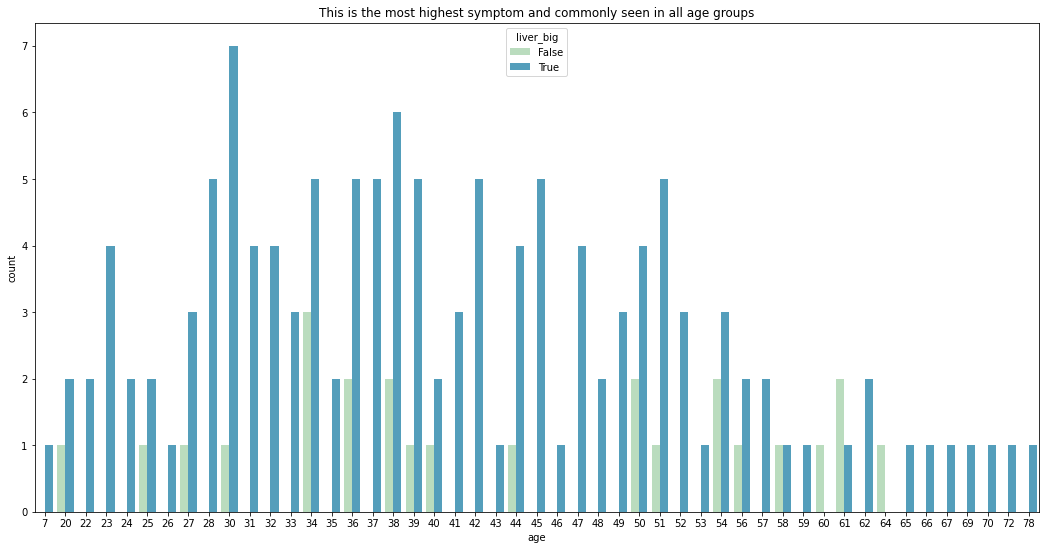

In [98]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='liver_big', palette='GnBu')
plt.title("This is the most highest symptom and commonly seen in all age groups")

# Patients Consuming Liver_firm Current Status:

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


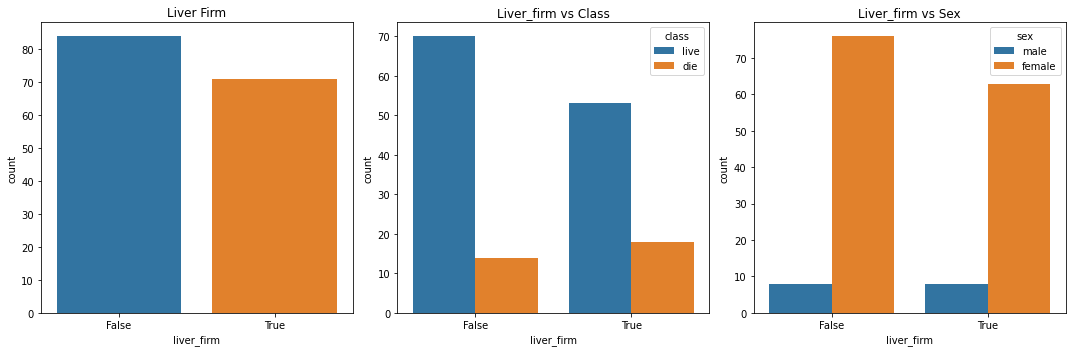

In [60]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['liver_firm'], ax= ax[0]);
sns.countplot(df1['liver_firm'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['liver_firm'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('Liver Firm')
ax[1].set_title('Liver_firm vs Class')
ax[2].set_title('Liver_firm vs Sex')
plt.tight_layout();

In [123]:
categorical_data.groupby(categorical_data['sex'])['liver_firm'].value_counts(normalize=True)*100

sex     liver_firm
female  False         54.676259
        True          45.323741
male    False         50.000000
        True          50.000000
Name: liver_firm, dtype: float64

Text(0.5, 1.0, 'This symptom is commonly seen in age group between(34-39)')

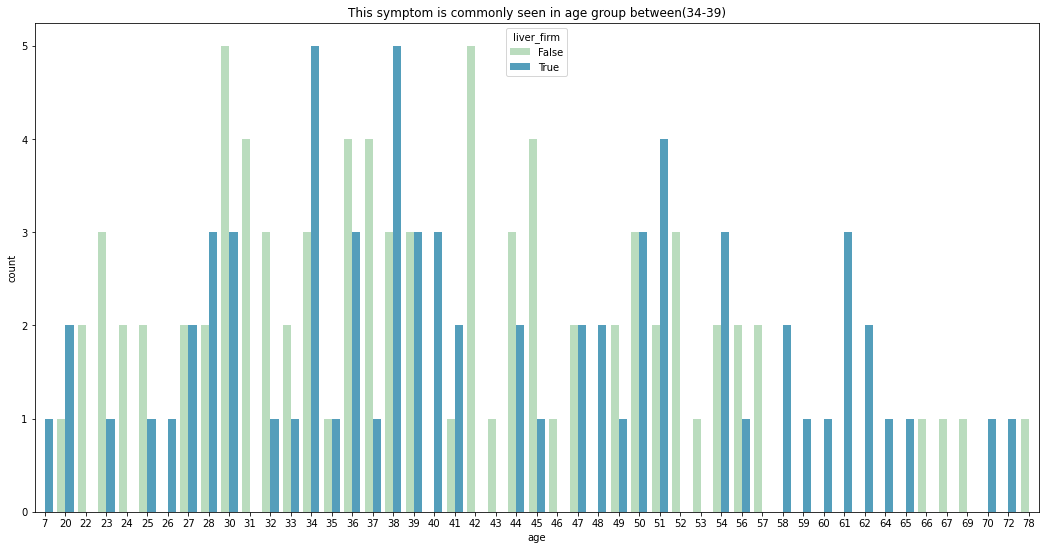

In [99]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='liver_firm', palette='GnBu')
plt.title("This symptom is commonly seen in age group between(34-39)")

# Patients Consuming Spleen Palpable Current Status:

 - Spleen = The spleen is an organ found in virtually all vertebrates. Similar in structure to a large lymph node, it acts primarily as a blood filter.
 - Palpable = capable of being touched or felt.
 - Spleen Palpable = It is an organ found in the vertibrates and checking if there are any symptoms in the organs.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


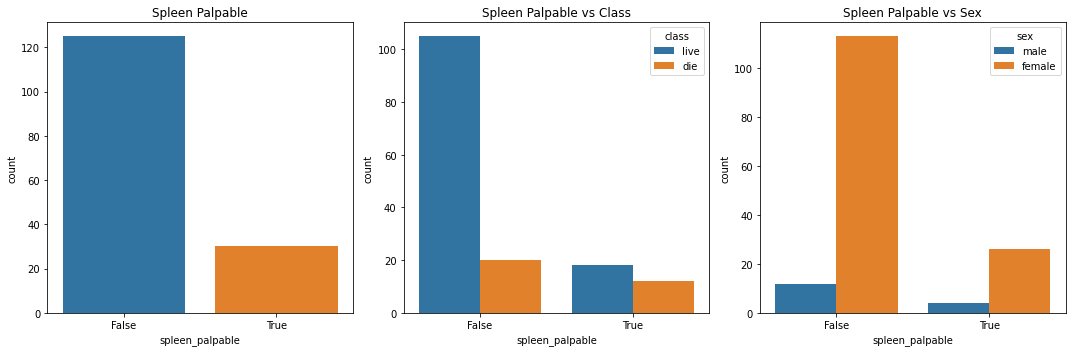

In [61]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['spleen_palpable'], ax= ax[0]);
sns.countplot(df1['spleen_palpable'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['spleen_palpable'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('Spleen Palpable')
ax[1].set_title('Spleen Palpable vs Class')
ax[2].set_title('Spleen Palpable vs Sex')
plt.tight_layout();

In [124]:
categorical_data.groupby(categorical_data['sex'])['spleen_palpable'].value_counts(normalize=True)*100

sex     spleen_palpable
female  False              81.294964
        True               18.705036
male    False              75.000000
        True               25.000000
Name: spleen_palpable, dtype: float64

Text(0.5, 1.0, 'Most of the patients does not have this symptoms')

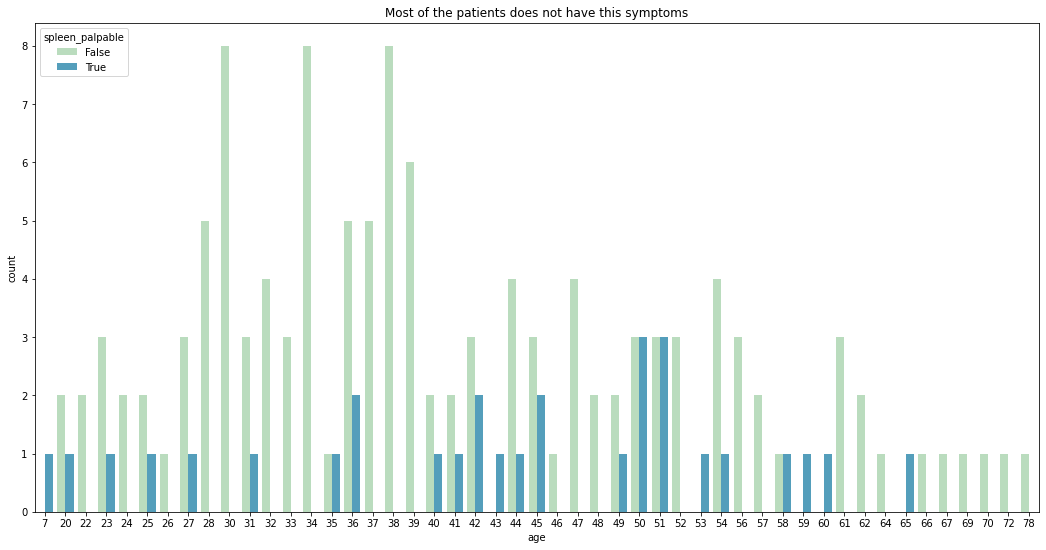

In [100]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='spleen_palpable', palette='GnBu')
plt.title("Most of the patients does not have this symptoms")

# Patients Consuming Spiders Status:

A spider nevus is a collection of small, dilated arterioles (blood vessels) clustered very close to the surface of the skin. The cluster of vessels is web-like, with a central spot and radiating vessels and this is most commonly seen in women during pregnancy.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


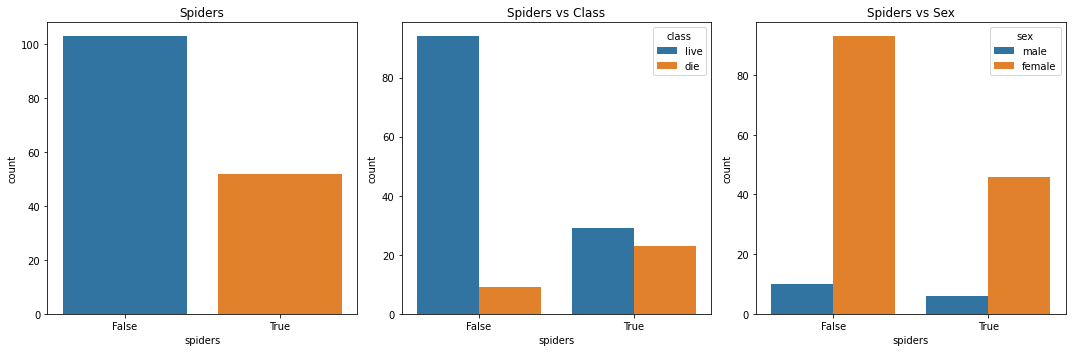

In [62]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['spiders'], ax= ax[0]);
sns.countplot(df1['spiders'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['spiders'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('Spiders')
ax[1].set_title('Spiders vs Class')
ax[2].set_title('Spiders vs Sex')
plt.tight_layout();

In [125]:
categorical_data.groupby(categorical_data['sex'])['spiders'].value_counts(normalize=True)*100

sex     spiders
female  False      66.906475
        True       33.093525
male    False      62.500000
        True       37.500000
Name: spiders, dtype: float64

Text(0.5, 1.0, 'Most of the patients does not have this symptoms')

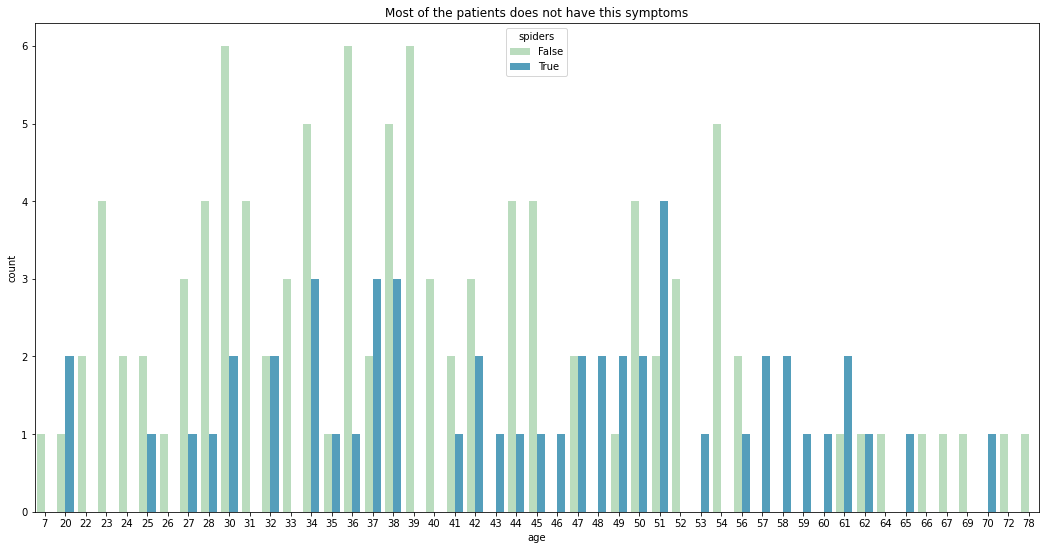

In [101]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='spiders', palette='GnBu')
plt.title("Most of the patients does not have this symptoms")

# Patients Consuming Ascites Status:

Ascites is a abdominal swelling caused by accumulation of fluid, most often related to liver disease.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


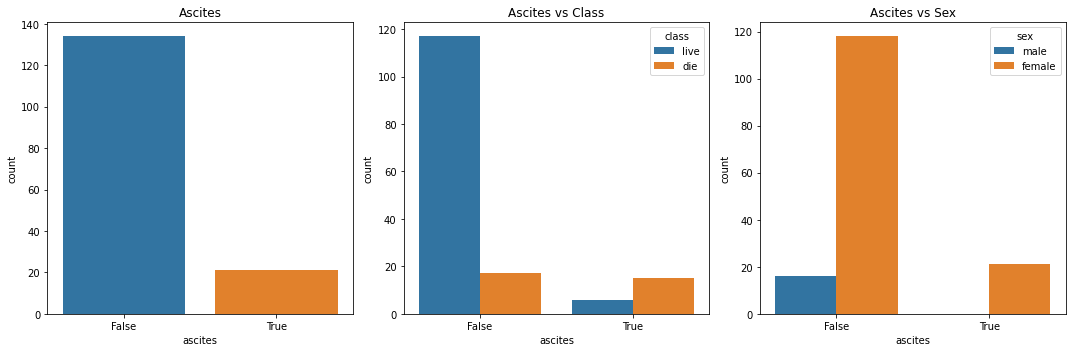

In [63]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['ascites'], ax= ax[0]);
sns.countplot(df1['ascites'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['ascites'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('Ascites')
ax[1].set_title('Ascites vs Class')
ax[2].set_title('Ascites vs Sex')
plt.tight_layout();

In [126]:
categorical_data.groupby(categorical_data['sex'])['ascites'].value_counts(normalize=True)*100

sex     ascites
female  False       84.892086
        True        15.107914
male    False      100.000000
Name: ascites, dtype: float64

Text(0.5, 1.0, 'Most of the patients in all age groups does not have this symptoms')

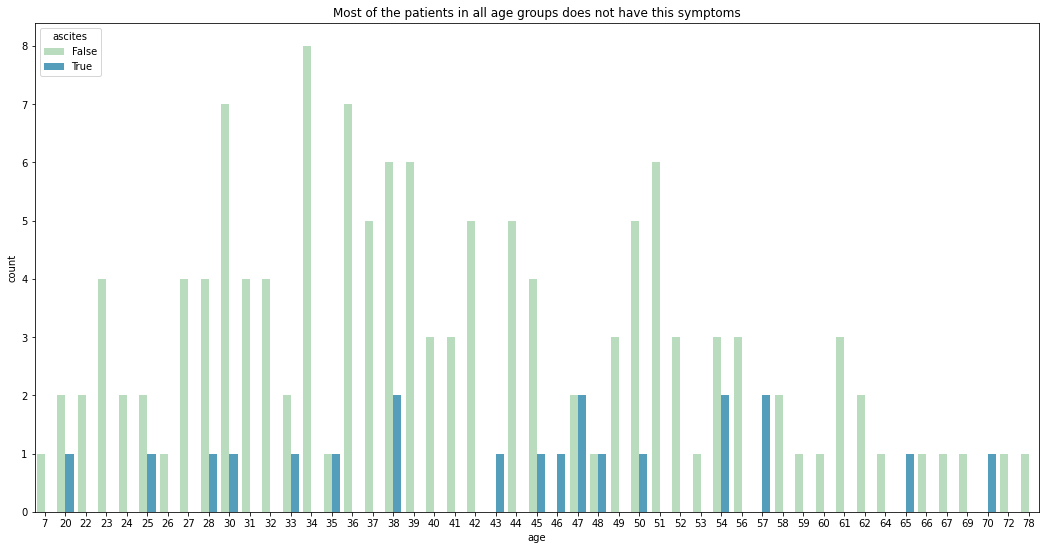

In [102]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='ascites', palette='GnBu')
plt.title("Most of the patients in all age groups does not have this symptoms")

# Patients Consuming Varices Status:

Varices is a abnormal veins in the lower part of the tube running from the throat to the stomach.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


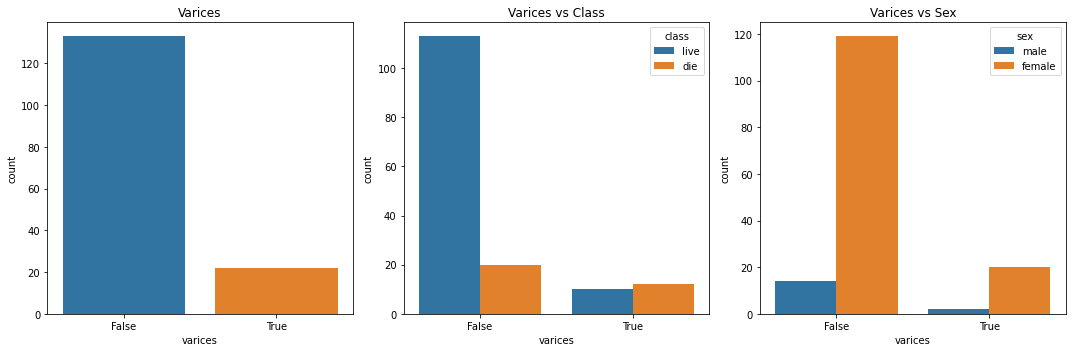

In [65]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
sns.countplot(df1['varices'], ax= ax[0]);
sns.countplot(df1['varices'],hue = df1['class'],ax = ax[1]);
sns.countplot(df1['varices'],hue = df1['sex'],ax = ax[2]);
ax[0].set_title('Varices')
ax[1].set_title('Varices vs Class')
ax[2].set_title('Varices vs Sex')
plt.tight_layout();

In [128]:
categorical_data.groupby(categorical_data['sex'])['varices'].value_counts(normalize=True)*100

sex     varices
female  False      85.611511
        True       14.388489
male    False      87.500000
        True       12.500000
Name: varices, dtype: float64

Text(0.5, 1.0, 'Most of the patients does not have this symptoms')

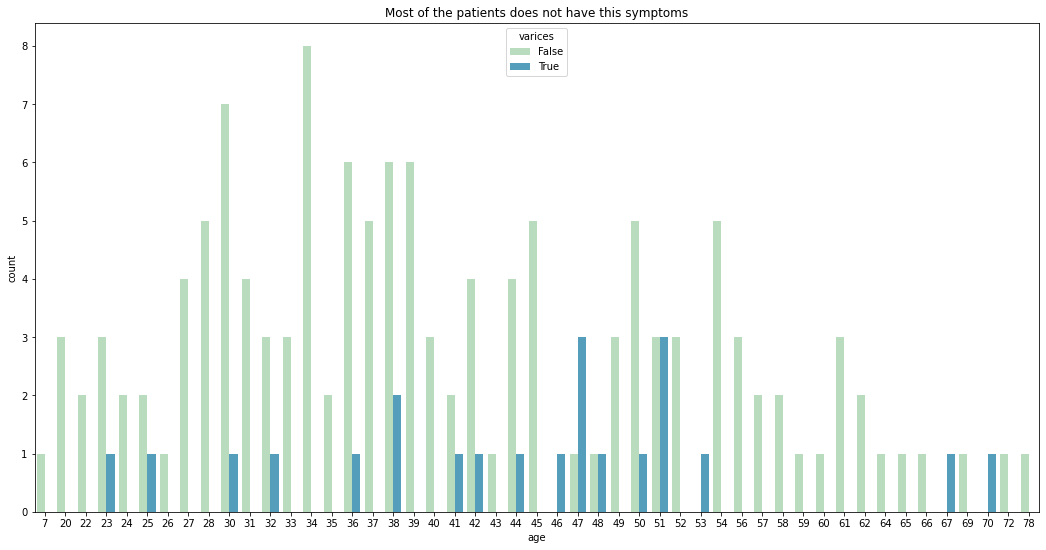

In [103]:
plt.figure(figsize=(18,9))
sns.countplot(x='age',data = df1, hue='varices', palette='GnBu')
plt.title("Most of the patients does not have this symptoms")

In [30]:
df1.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,155.000000,155.000000,155.000000,155.00000,155.000000
mean,41.200000,1.393548,101.270968,86.412903,3.91871,55.270968
std,12.565878,1.200578,47.340204,89.370293,0.76987,22.903329
min,7.000000,0.300000,26.000000,14.000000,2.10000,0.000000
25%,32.000000,0.700000,76.000000,31.500000,3.50000,35.000000
50%,39.000000,1.000000,85.000000,58.000000,4.00000,50.000000
75%,50.000000,1.500000,119.500000,105.500000,4.20000,71.000000
max,78.000000,8.000000,295.000000,648.000000,6.40000,100.000000


In [31]:
df1.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

The numerical columns are seperated from the imputed data and each numerical columns are plotted in distplot to check the skewness of the data.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

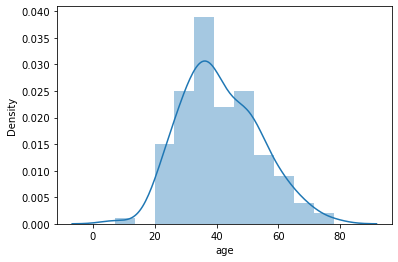

In [32]:
sns.distplot(df1['age'],kde=True)

# Bilirubin:

 - Bilirubin is a yellow compound that occurs in the normal catabolic pathway that breaks down heme in vertebrates.
 
Symptoms:
 - You can have mildly high bilirubin and have no symptoms at all. Or, with moderately high bilirubin, you may only have jaundice, a yellow cast to your eyes and skin.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bilirubin', ylabel='Density'>

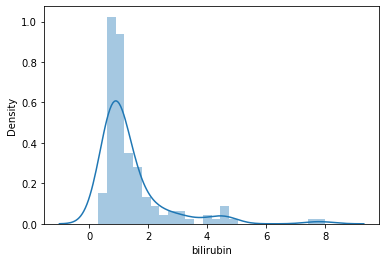

In [33]:
sns.distplot(df1['bilirubin'],kde=True)

# Alkaline Phosphate:

 - Alkaline phosphatase (ALP) is an enzyme in a person’s blood that helps break down proteins. The body uses ALP for a wide range of processes, and it plays a particularly important role in liver function and bone development.
 
Symptoms:
 - You have alkaline phosphatase throughout your body, including your liver, digestive system, kidneys, and bones.If you show signs of liver disease or a bone disorder, your doctor may order an alkaline phosphatase (ALP) test to measure the amount of the enzyme in your blood and help in diagnosing the problem.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alk_phosphate', ylabel='Density'>

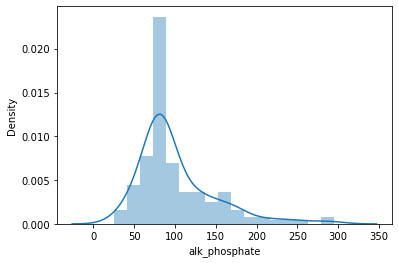

In [34]:
sns.distplot(df1['alk_phosphate'],kde=True)

# SGOT - (serum glutamic-oxaloacetic transaminas)

The SGOT test is a blood test that's part of a liver profile. It measures one of two liver enzymes, this enzyme is usually called AST, which stands for aspartate aminotransferase. An SGOT test (or AST test) evaluates how much of the liver enzyme is in the blood.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sgot', ylabel='Density'>

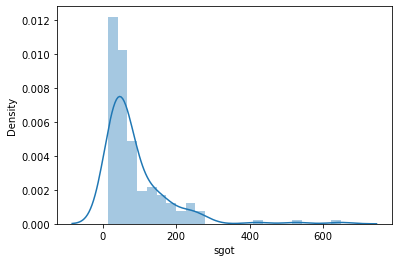

In [35]:
sns.distplot(df1['sgot'],kde=True)

# Albumin:

Albumin is a protein made by your liver. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues.It makes up about 60% of the total protein in the blood and plays many roles. This test measures the level of albumin in the blood.

Albumin keeps fluid from leaking out of blood vessels, nourishes tissues, and transports hormones, vitamins, drugs, and substances like calcium throughout the body.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='albumin', ylabel='Density'>

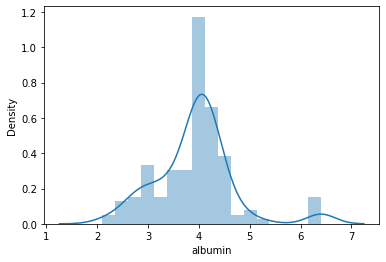

In [36]:
sns.distplot(df1['albumin'],kde=True)

# Protime:

Prothrombin time (PT) is a blood test that measures how long it takes blood to clot. A prothrombin time test can be used to check for bleeding problems. PT is also used to check whether medicine to prevent blood clots is working.

C:\Users\91979\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='protime', ylabel='Density'>

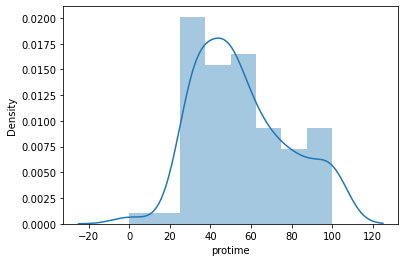

In [37]:
sns.distplot(df1['protime'],kde=True)

None of the numerical variables follows normal distribution so the total distribution is distorted.

# Jointplots for Numerical variables:

This jointplot shows the relationship between two variables. Both variables having decimal points, here relationship between bilirubin and albumine is seen because both of them are fluid released by the body to execute toxins.

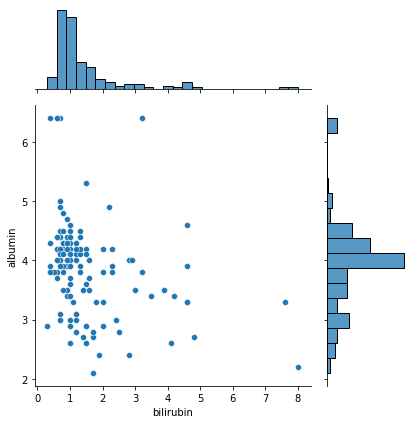

In [42]:
sns.jointplot(x='bilirubin', y='albumin', data=df1,ratio=3)

This jointplot shows relationship between alkaline phosphate and protime because both variables aare related to the blood particles.

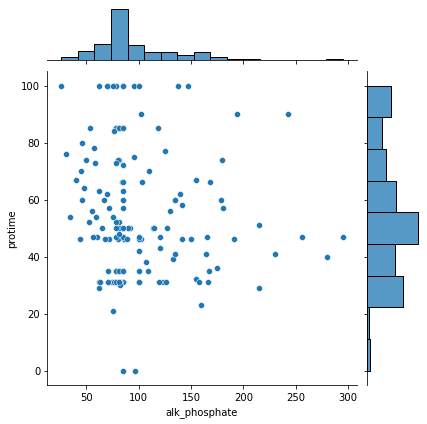

In [49]:
sns.jointplot(x='alk_phosphate', y='protime', data= df1)

# CHECKING FOR OUTLIERS:

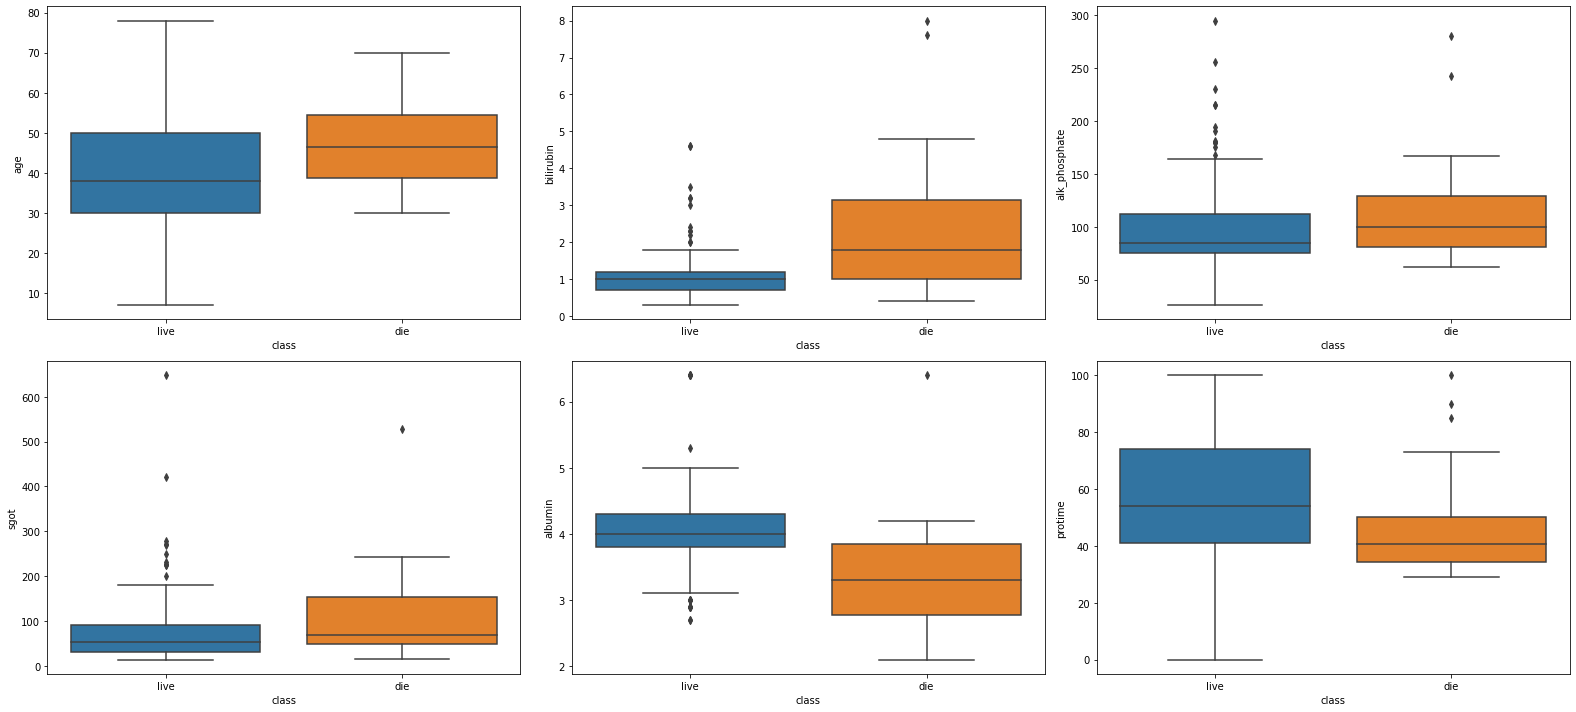

In [114]:
fig,ax = plt.subplots(2,3,figsize=[22,10])
sns.boxplot(data = df1, x=df1['class'], y= 'age', ax=ax[0,0])
sns.boxplot(data = df1, x=df1['class'], y= 'bilirubin', ax=ax[0,1])
sns.boxplot(data = df1, x=df1['class'], y= 'alk_phosphate', ax=ax[0,2])
sns.boxplot(data = df1, x=df1['class'], y= 'sgot', ax=ax[1,0])
sns.boxplot(data = df1, x=df1['class'], y= 'albumin', ax=ax[1,1])
sns.boxplot(data = df1, x=df1['class'], y= 'protime', ax=ax[1,2])
plt.tight_layout();

This data contains outliers for several numerical variables.

# CHECKING FOR CORRELATION:

In [131]:
df1.corr("spearman")

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,-0.101275,0.022332,0.267442,0.118266,-0.080194,-0.093744,0.115819,0.107537,0.201809,0.100323,0.117193,0.176607,0.150305,0.077947,-0.176839,-0.157957,0.206834
steroid,-0.101275,1.000000,-0.074101,-0.143542,-0.229704,-0.067050,0.195786,-0.096575,-0.068482,-0.031913,0.016297,0.071325,0.018859,-0.000434,-0.064756,0.201662,0.031953,-0.083641
antivirals,0.022332,-0.074101,1.000000,-0.055310,-0.016251,-0.042072,-0.054746,0.036026,-0.164548,-0.153038,-0.169444,-0.174083,-0.222161,-0.252845,-0.098671,0.099044,0.155273,-0.209242
fatigue,0.267442,-0.143542,-0.055310,1.000000,0.597424,0.378272,-0.105254,0.248808,0.192669,0.384153,0.293588,0.185711,0.341242,0.119744,0.239178,-0.248404,-0.105763,0.158201
malaise,0.118266,-0.229704,-0.016251,0.597424,1.000000,0.600545,-0.041697,0.134066,0.006470,0.322640,0.337076,0.202146,0.277491,0.172585,0.227604,-0.274100,-0.099439,0.144667
anorexia,-0.080194,-0.067050,-0.042072,0.378272,0.600545,1.000000,-0.079685,0.074922,0.032536,0.312757,0.217244,0.203617,0.210382,0.073898,0.177620,-0.125359,-0.018932,0.081623
liver_big,-0.093744,0.195786,-0.054746,-0.105254,-0.041697,-0.079685,1.000000,-0.406577,-0.095959,-0.208525,0.122348,0.077827,-0.048119,-0.102736,0.068816,-0.061598,-0.177485,-0.060262
liver_firm,0.115819,-0.096575,0.036026,0.248808,0.134066,0.074922,-0.406577,1.000000,0.172335,0.334051,0.090073,0.182650,0.154897,0.273921,0.121573,-0.185228,0.057747,0.206480
spleen_palpable,0.107537,-0.068482,-0.164548,0.192669,0.006470,0.032536,-0.095959,0.172335,1.000000,0.274454,0.092351,0.175096,0.194607,0.297166,0.070453,-0.172951,-0.104298,0.211702
spiders,0.201809,-0.031913,-0.153038,0.384153,0.322640,0.312757,-0.208525,0.334051,0.274454,1.000000,0.317600,0.337481,0.251169,0.244828,0.204344,-0.307216,-0.084668,0.371112


Using spearman correlation coefficient the correlation between the total variables are checked and using pearson r coeffecient and checked weather the columns are significant or insignificant. 

In [135]:
from scipy.stats import pearsonr
for i in numerical_data.columns:
    print(i)
    
    for j in numerical_data.columns:
        if i != j:
            
            p = pearsonr(numerical_data[i],numerical_data[j])
            if p[1]>= 0.05:
                print(j,"corr----->",p[0],"prob---->",p[1],'\nResults insignificant')
            else:
                print(j,"corr----->",p[0],"prob---->",p[1],'\nResults significant')
    print("\n")

age
bilirubin corr-----> 0.10493729802404562 prob----> 0.1937811605970011 
Results insignificant
alk_phosphate corr-----> 0.027405253648144126 prob----> 0.7349906224410793 
Results insignificant
sgot corr-----> 0.10375698654825745 prob----> 0.1988697508147065 
Results insignificant
albumin corr-----> -0.1008047977645795 prob----> 0.21201917122454256 
Results insignificant
protime corr-----> -0.18030621320579693 prob----> 0.024764505759918308 
Results significant


bilirubin
age corr-----> 0.10493729802404562 prob----> 0.1937811605970011 
Results insignificant
alk_phosphate corr-----> 0.14071928029302094 prob----> 0.08073094300518502 
Results insignificant
sgot corr-----> 0.2253998748157497 prob----> 0.004804279815981351 
Results significant
albumin corr-----> -0.32359946995214706 prob----> 4.0042255846467846e-05 
Results significant
protime corr-----> -0.20857572333431135 prob----> 0.009202546380670092 
Results significant


alk_phosphate
age corr-----> 0.027405253648144126 prob----> 0

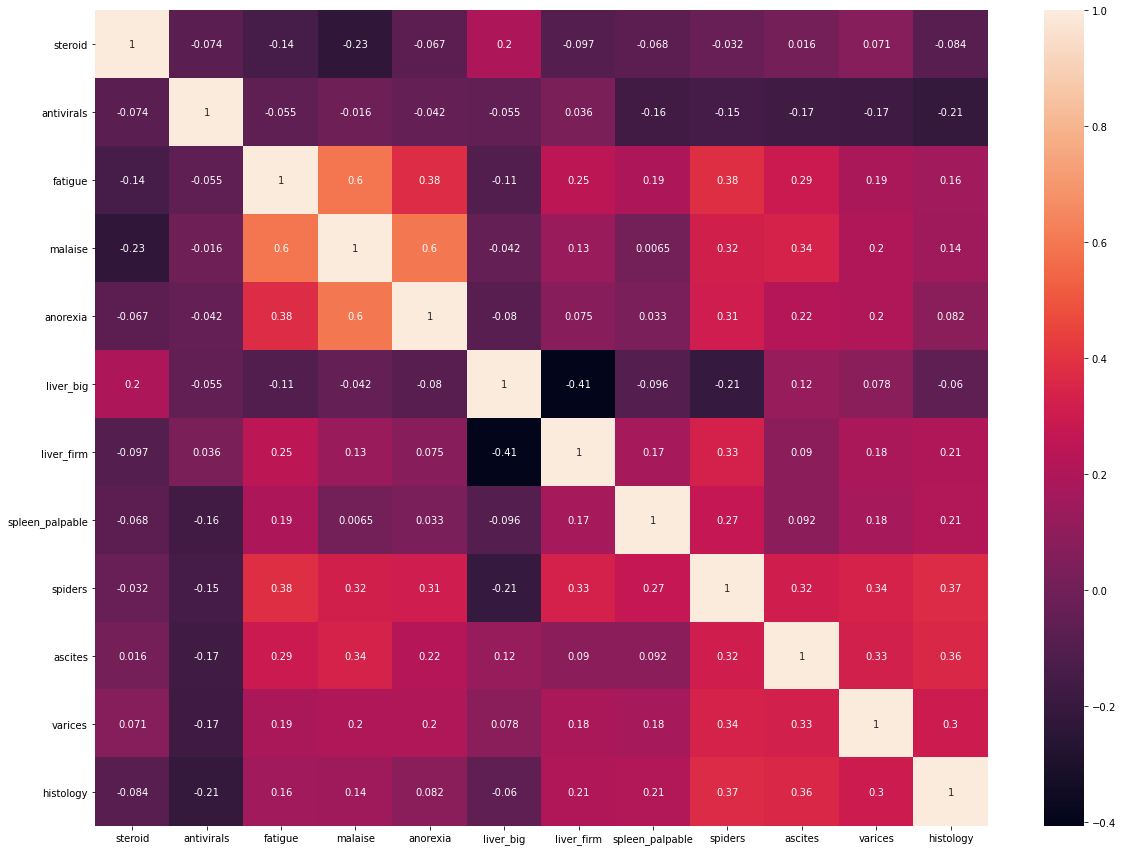

In [133]:
fig = plt.figure(figsize=[20,15])
sns.heatmap(data = df1.loc[:,['steroid','antivirals','fatigue','malaise','anorexia','liver_big',
                             'liver_firm','spleen_palpable',
         'spiders','ascites','varices','histology','class']].corr(method='spearman'),annot=True);

The significance is tested using spearmans correlation

# CONCLUTION: 

The Exploratory data analysis is performed for the given hepatitis dataset. The dataset is viewed and and concluded that it contains both numerical and categorical variables.

 - Both male and female took steroids and it is helpfull to cure disease.
 - The protime secretion between 20-60 are mostly died.